## Pyber Data Analysis

#### Data Observations



In terms of average fare, rural cities have the highest, followed by suburban and urban cities. Urban cities have the highest number of drivers however these drivers are required to complete more rides to achieve the same income as suburban and rural drivers. Based on the pie charts below, it seems that the percentage breakdown of fares and rides by city type is fairly even however the percentage of drivers in urban areas is much higher. This suggests that although there are more rides in urban areas, the drivers as individuals make less due to lower ratio of ride to driver. 




In [44]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_df = pd.read_csv('./data/city_data.csv')
ride_data_df = pd.read_csv('./data/ride_data.csv')

In [235]:
#merge data into one table and display top 5
city_ride_data_df = pd.merge(city_data_df, ride_data_df, on = 'city', how = 'inner')

### Bubble Plot

In [46]:
# information per city
city_group = city_ride_data_df.groupby('city')
average_fare_city = city_group['fare'].mean()
total_rides_city = city_group['ride_id'].count()
total_drivers_city = city_group['driver_count'].first()
city_type = city_group['type'].first()

In [47]:
city_group_df = pd.DataFrame({'Average Fare': average_fare_city, 'Total Rides': total_rides_city, 'Total Drivers': total_drivers_city, 'City Type': city_type})

In [66]:
city_group_urban = city_group_df.loc[(city_group_df['City Type'] == 'Urban')]
city_group_suburban = city_group_df.loc[(city_group_df['City Type'] == 'Suburban')]
city_group_rural = city_group_df.loc[(city_group_df['City Type'] == 'Rural')]

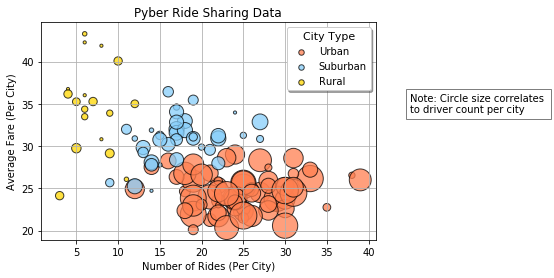

In [237]:
#create scatter plots
urban_data = plt.scatter(city_group_urban['Total Rides']
                         , city_group_urban['Average Fare']
                         , facecolors = 'coral'
                         , edgecolors = 'black'
                         , s = city_group_urban['Total Drivers'] * 10
                         , alpha = 0.75)

suburban_data = plt.scatter(city_group_suburban['Total Rides']
                            , city_group_suburban['Average Fare']
                            , facecolors = 'lightskyblue'
                            , edgecolors = 'black'
                            , s = city_group_suburban['Total Drivers'] * 10
                            , alpha = 0.75)

rural_data = plt.scatter(city_group_rural['Total Rides']
                         , city_group_rural['Average Fare']
                         , facecolors = 'gold'
                         , edgecolors = 'black'
                         , s = city_group_rural['Total Drivers'] * 10
                         , alpha = 0.75)

#create labels
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare (Per City)')
plt.text(45, 35, 'Note: Circle size correlates \nto driver count per city'
         , horizontalalignment = 'left'
         , verticalalignment = 'center'
         , bbox = dict(facecolor = 'white', alpha = 0.5))
legend_labels = ['Urban', 'Suburban', 'Rural']
legend = plt.legend([urban_data, suburban_data, rural_data]
                    , legend_labels
                    , markerscale = 1
                    , shadow = True
                    , title = 'City Type'
                    , title_fontsize = 11)

for i in range(3):
    legend.legendHandles[i]._sizes = [30]

plt.grid()
plt.savefig('./rides_fare_by_city.png')

### Total Fares by City Type

In [103]:
%matplotlib inline

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [172]:
#set values for color and explode
explode = (0,0,0.1)
colors = ('gold', 'lightskyblue', 'coral')

In [144]:
#Get data for fares and rides by city
city_type_group = city_ride_data_df.groupby('type')
total_fares_type = city_type_group['fare'].sum()
total_rides_type = city_type_group['ride_id'].count()

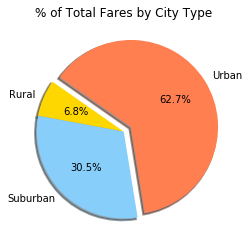

In [173]:
#Plot pie chart for total fares by city type
plt.pie(total_fares_type
        , explode = explode
        , labels = total_fares_type.keys()
        , shadow = True
        , colors = colors
        , autopct = '%1.1f%%'
        , startangle = 145
        , wedgeprops = {'linewidth': 2})

plt.title('% of Total Fares by City Type')
plt.savefig('./Pyber_total_fare_by_type.png')

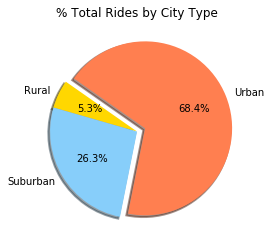

In [176]:
#Plot pie chart for total rides by city type
plt.pie(total_rides_type
        , explode = explode
        , labels = total_rides_type.keys()
        , shadow = True
        , colors = colors
        , autopct = '%1.1f%%'
        , startangle = 145
        , wedgeprops = {'linewidth': 2})

plt.title('% Total Rides by City Type')
plt.savefig('./Pyber_total_rides_by_type.png')

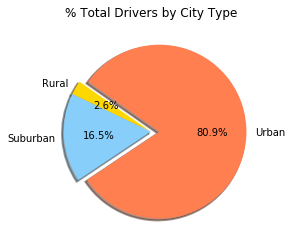

In [175]:
city_type_group_2 = city_data_df.groupby('type')
total_driver_type = city_type_group_2['driver_count'].sum()

#Plot pie chart for number of drivers by city type
plt.pie(total_driver_type
        , explode = explode
        , labels = total_driver_type.keys()
        , shadow = True
        , colors = colors
        , autopct = '%1.1f%%'
        , startangle = 145
        , wedgeprops = {'linewidth': 2})

plt.title('% Total Drivers by City Type')
plt.savefig('./Pyber_drivers_by_type.png')